<div style="text-align: center;">
    <img src="coca-cola-logo-svgrepo-com.svg" alt="Coca-Cola Logo" width="200">
</di>


<center><h1 style="color:red;">Stock Analysis</h1></center>

## Import required libraries 

In [157]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

### Load data

In [31]:
coca_cola_data = pd.read_csv('../Datasets/Coca-Cola_stock_history.csv')
coca_cola_data.reset_index(inplace=True)
coca_cola_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0


In [32]:
coca_cola_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         15311 non-null  int64  
 1   Date          15311 non-null  object 
 2   Open          15311 non-null  float64
 3   High          15311 non-null  float64
 4   Low           15311 non-null  float64
 5   Close         15311 non-null  float64
 6   Volume        15311 non-null  int64  
 7   Dividends     15311 non-null  float64
 8   Stock Splits  15311 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 1.1+ MB


## Data Preprocessing

### `Data Cleaning` 

First lets see if there is any missing values in our data 

In [33]:
coca_cola_data.isnull().sum()

index           0
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

As we can see there is no  missing values in our dataset 

### `Feature Engineering`

Now we will add moving averages of stock for coco cola 

In [34]:
coca_cola_data['MA_20'] = coca_cola_data['Close'].rolling(window=20).mean()

In [35]:
coca_cola_data['MA_50'] = coca_cola_data['Close'].rolling(window=50).mean()

Now lets add daily returns of the data

In [36]:
coca_cola_data['Daily_Return'] = coca_cola_data['Close'].pct_change()

In [37]:
coca_cola_data['Volatility'] = coca_cola_data['Daily_Return'].rolling(window=20).std()

In [38]:
coca_cola_data.isnull().sum()

index            0
Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
MA_20           19
MA_50           49
Daily_Return     1
Volatility      20
dtype: int64

Now we can see there are some null values due to rolling calculations, we need to drop that null values 

In [39]:
coca_cola_data.dropna(inplace=True)

In [40]:
coca_cola_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA_20,MA_50,Daily_Return,Volatility
49,49,1962-03-13,0.046416,0.046789,0.046416,0.046789,1344000,0.001563,0,0.045788,0.046525,0.015962,0.013223
50,50,1962-03-14,0.046789,0.046976,0.046603,0.046852,1689600,0.000000,0,0.045797,0.046461,0.001334,0.013226
51,51,1962-03-15,0.046852,0.046976,0.046603,0.046603,883200,0.000000,0,0.045836,0.046415,-0.005320,0.012546
52,52,1962-03-16,0.046603,0.046789,0.046603,0.046603,768000,0.000000,0,0.045889,0.046362,0.000000,0.012460
53,53,1962-03-19,0.046603,0.047101,0.046603,0.046852,921600,0.000000,0,0.045953,0.046336,0.005348,0.012491


As we can see new cols are added to our dataset

### `Exploratory Data Analysis` 

In [41]:
data.describe()

,index,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA_20
count,15311.000000,15311.000000,15311.000000,15311.000000,15311.000000,1.531100e+04,15311.000000,15311.000000,15292.000000
mean,7655.000000,11.812883,11.906708,11.717375,11.815409,9.139213e+06,0.001678,0.001110,11.795014
std,4420.049321,15.025726,15.133336,14.915580,15.026316,7.957947e+06,0.021302,0.049148,14.985785
min,0.000000,0.037154,0.037279,0.034890,0.037028,7.680000e+04,0.000000,0.000000,0.038886
25%,3827.500000,0.238453,0.240305,0.236415,0.238312,2.889600e+06,0.000000,0.000000,0.237871
50%,7655.000000,4.935146,4.980985,4.884242,4.937339,7.708800e+06,0.000000,0.000000,4.972139
75%,11482.500000,17.383926,17.612844,17.168283,17.415106,1.307130e+07,0.000000,0.000000,17.285336
max,15310.000000,66.037933,66.235058,64.776308,65.259270,1.241690e+08,0.440000,3.000000,64.089813


#### Heatmap 

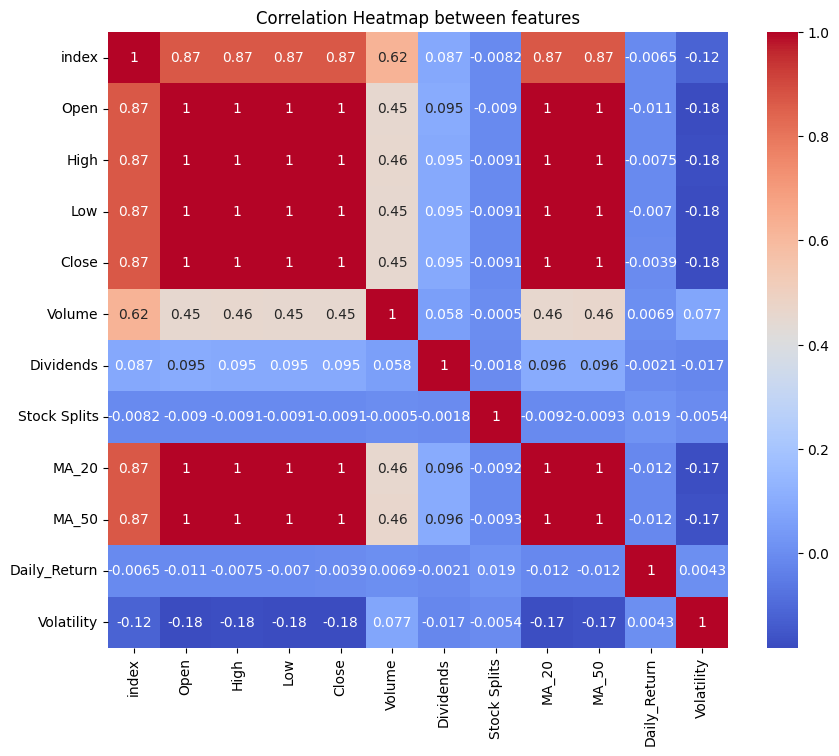

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(coca_cola_data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between features')
plt.show()

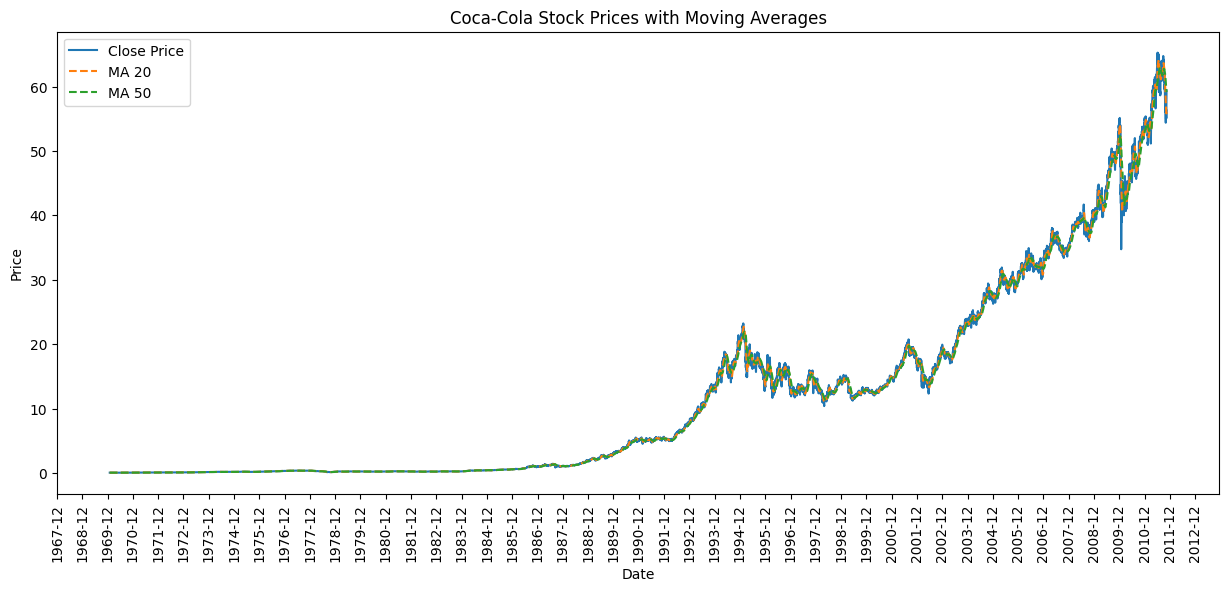

CPU times: total: 4.86 s
Wall time: 4.9 s


In [49]:
%%time
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))

# Plot the closing price and moving averages
plt.plot(coca_cola_data['Date'], coca_cola_data['Close'], label='Close Price')
plt.plot(coca_cola_data['Date'], coca_cola_data['MA_20'], label='MA 20', linestyle='--')
plt.plot(coca_cola_data['Date'], coca_cola_data['MA_50'], label='MA 50', linestyle='--')

# Format the x-axis to show fewer date labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))  # Show every 2 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as YYYY-MM

plt.title('Coca-Cola Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotate date labels for better visibility
plt.xticks(rotation=90)

plt.show()


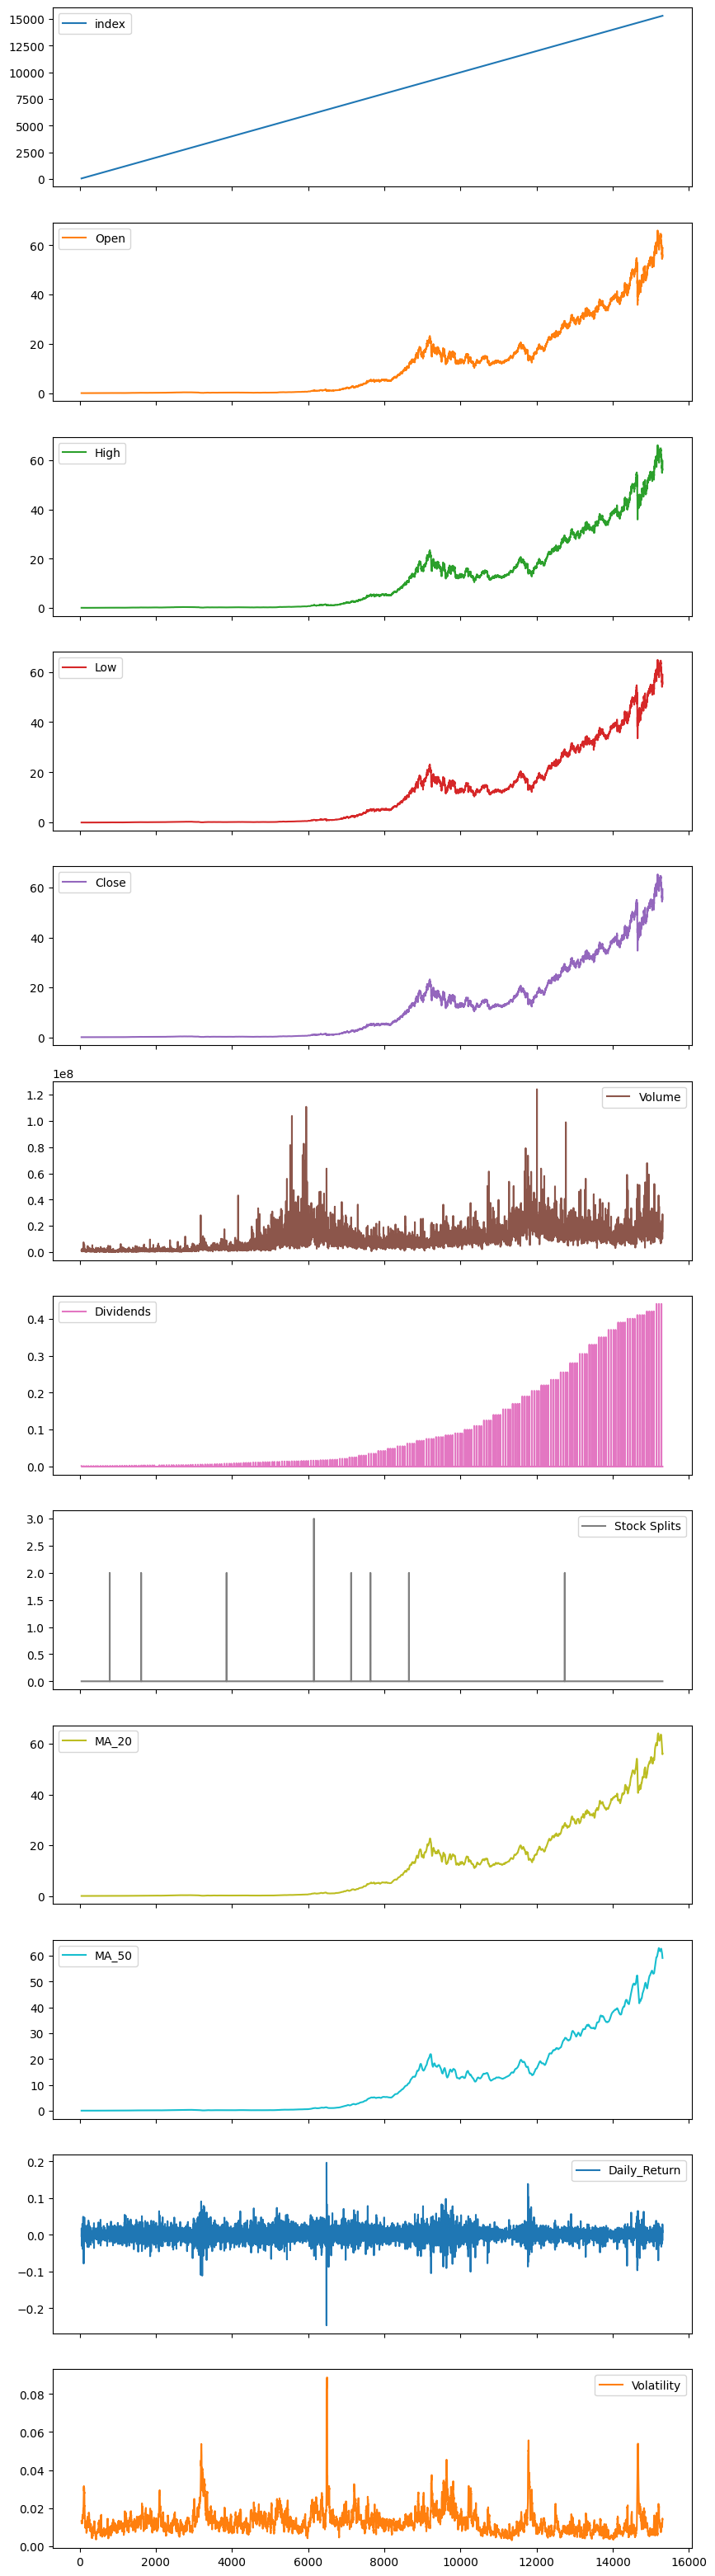

In [83]:
coca_cola_data.plot(subplots = True, figsize = (10,40))
plt.show()

### `Train-Test Data Splitting`

In [95]:
input_features = ['Open', 'High', 'Low', 'Volume', 'MA_20', 'MA_50', 'Daily_Return', 'Volatility']
target = 'Close'

In [96]:
data_input = coca_cola_data[input_features]

In [97]:
data_ouput = coca_cola_data[target]

Now divide the data into input and ouput 

In [98]:
x_train, x_test, y_train, y_test = train_test_split(data_input, data_ouput,
test_size=0.2, random_state=42, shuffle=False)

In [99]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (12209, 8)
x_test shape: (3053, 8)
y_train shape: (12209,)
y_test shape: (3053,)


Now 20 percent data is for testing and rest (80 percent) for training 

### `Model Training` 

#### DecisionTreeRegressor

In [100]:
dt_model = DecisionTreeRegressor(random_state=42)

In [101]:
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

Now predict the output

In [102]:
y_train_preds = dt_model.predict(x_train)

In [103]:
y_test_preds = dt_model.predict(x_test)

In [141]:
# Model evaluation for training
mse = mean_squared_error(y_train, y_train_preds)
mae = mean_absolute_error(y_train, y_train_preds)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Calculate RMSE by taking the square root of MSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.00030588384449390597
Mean Absolute Error: 0.007895058899272028
Root Mean Squared Error: 0.017489535285247174


In [140]:
# Model evaluation for testing
mse = mean_squared_error(y_test, y_test_preds)
mae = mean_absolute_error(y_test, y_test_preds)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Calculate RMSE by taking the square root of MSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 328.00422958885144
Mean Absolute Error: 14.670273055284303
Root Mean Squared Error: 18.11088704588628


DecisionTreeRegressor gives good prediction but is overfitted on training data

#### RandomForestRegressor

In [107]:
rf_model = RandomForestRegressor(random_state=42)

In [108]:
%%time
rf_model.fit(x_train, y_train)

CPU times: total: 8.56 s
Wall time: 8.64 s


RandomForestRegressor(random_state=42)

Now predict the output

In [109]:
y_train_preds = rf_model.predict(x_train)

In [110]:
y_test_preds = rf_model.predict(x_test)

In [139]:
# Model evaluation for training
mse = mean_squared_error(y_train, y_train_preds)
mae = mean_absolute_error(y_train, y_train_preds)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Calculate RMSE by taking the square root of MSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.00030588384449390597
Mean Absolute Error: 0.007895058899272028
Root Mean Squared Error: 0.017489535285247174


In [138]:
# Model evaluation for testing
mse = mean_squared_error(y_test, y_test_preds)
mae = mean_absolute_error(y_test, y_test_preds)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Calculate RMSE by taking the square root of MSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 328.00422958885144
Mean Absolute Error: 14.670273055284303
Root Mean Squared Error: 18.11088704588628


As we can see that for RandomForestRegressor, the ovefitting is reduced

#### XGBRegressor 

In [143]:
xg_model = XGBRegressor(random_state=42)

In [144]:
xg_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Now predict the output

In [145]:
y_train_preds = xg_model.predict(x_train)

In [146]:
y_test_preds = xg_model.predict(x_test)

In [147]:
# Model evaluation for training
mse = mean_squared_error(y_train, y_train_preds)
mae = mean_absolute_error(y_train, y_train_preds)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Calculate RMSE by taking the square root of MSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.0007435394493197002
Mean Absolute Error: 0.01527474180616348
Root Mean Squared Error: 0.027267919783505675


In [148]:
# Model evaluation for testing
mse = mean_squared_error(y_test, y_test_preds)
mae = mean_absolute_error(y_test, y_test_preds)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Calculate RMSE by taking the square root of MSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 356.9661794862894
Mean Absolute Error: 15.55999950580679
Root Mean Squared Error: 18.89354862079354



As we can see for our case **RandomForestRegressor** works best


## Hyperparamter Tuning

In [158]:
%%time
# Define the parameter grid as before
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model,
                                   param_distributions=param_grid,
                                   n_iter=50,            # number of parameter settings sampled
                                   cv=5,
                                   scoring='neg_mean_squared_error',
                                   random_state=42,
                                   n_jobs=-1)

# Fit on training data
random_search.fit(x_train, y_train)

print("Best hyperparameters:", random_search.best_params_)
print("Best score (neg. MSE):", random_search.best_score_)

C:\Users\perso\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
75 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\perso\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\perso\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\perso\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\perso\anaconda3\Lib\site-packages

Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}
Best score (neg. MSE): -0.4526683289917945
CPU times: total: 4.03 s
Wall time: 4min 56s


In [159]:
# Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}
# Best score (neg. MSE): -0.4526683289917945
# CPU times: total: 4.03 s
# Wall time: 4min 56s

In [161]:
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=50, min_samples_split=5,min_samples_leaf=2, max_features='log2',max_depth=10)

In [163]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, max_features='log2', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=50, n_jobs=-1,
                      random_state=42)

In [164]:
y_test_preds = rf_model.predict(x_test)

In [165]:
# Model evaluation for testing
mse = mean_squared_error(y_test, y_test_preds)
mae = mean_absolute_error(y_test, y_test_preds)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Calculate RMSE by taking the square root of MSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 338.11798560539944
Mean Absolute Error: 14.988237277987727
Root Mean Squared Error: 18.38798481632502


## Live Prediction for Coco-Cola Stock

In [119]:
live_coca_cola_data = yf.download('KO', period='1d', interval='1m')

[*********************100%***********************]  1 of 1 completed


In [123]:
live_coca_cola_data.shape

(390, 5)

In [125]:
live_coca_cola_data['MA_20'] = live_coca_cola_data['Close'].rolling(window=20).mean()
live_coca_cola_data['MA_50'] = live_coca_cola_data['Close'].rolling(window=50).mean()
live_coca_cola_data['Daily_Return'] = live_coca_cola_data['Close'].pct_change()
live_coca_cola_data['Volatility'] = live_coca_cola_data['Daily_Return'].rolling(window=20).std()

In [126]:
# Fill the missing values
live_coca_cola_data.fillna(0, inplace=True)

In [129]:
input_features

['Open',
 'High',
 'Low',
 'Volume',
 'MA_20',
 'MA_50',
 'Daily_Return',
 'Volatility']

In [131]:
# Use the latest data point for prediction
latest_features = live_coca_cola_data[input_features].iloc[-1:].dropna()
live_prediction = rf_model.predict(latest_features)

print(f"Predicted Closing Price: {live_prediction[0]}")

Predicted Closing Price: 23.14031620260002


C:\Users\perso\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Here we are using Random Forest for prediction of Live Stock for Coca Cola Stock 